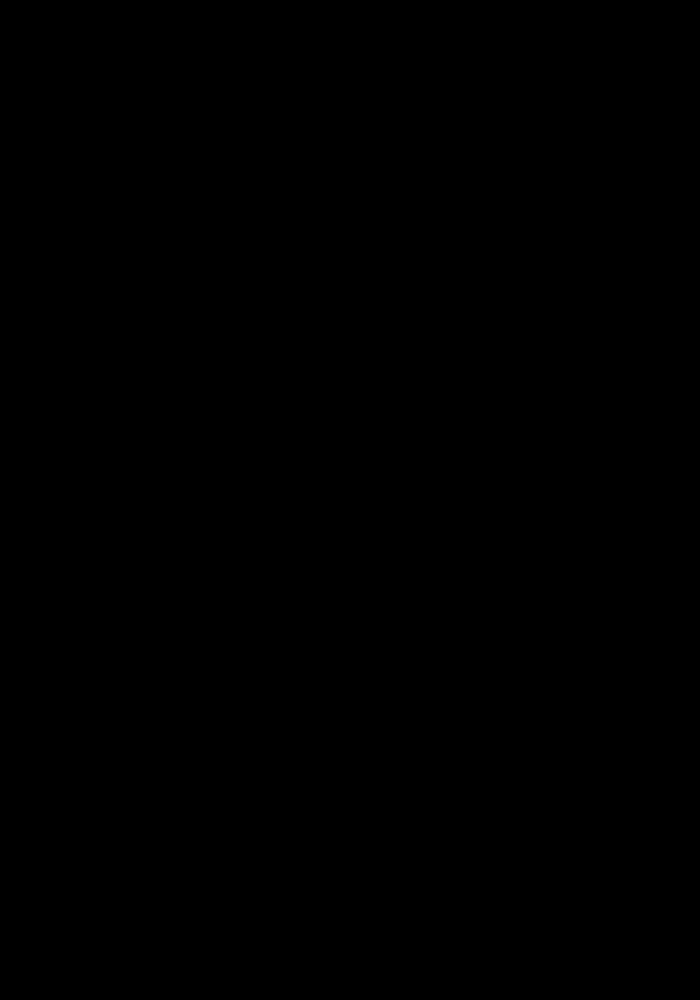

Image saved as 'blank_image.png' in NoteBook.


In [5]:
# Create an 1000x700 dp image using NUMPY

import numpy as np
from google.colab.patches import cv2_imshow
import cv2

height = 1000
width = 700
channels = 3  # Assuming RGB channels

blank_image = np.zeros((height, width, channels), dtype=np.uint8)

cv2_imshow(blank_image)
cv2.imwrite('blank_image.png', blank_image)
print("Image saved as 'blank_image.png' in NoteBook.")


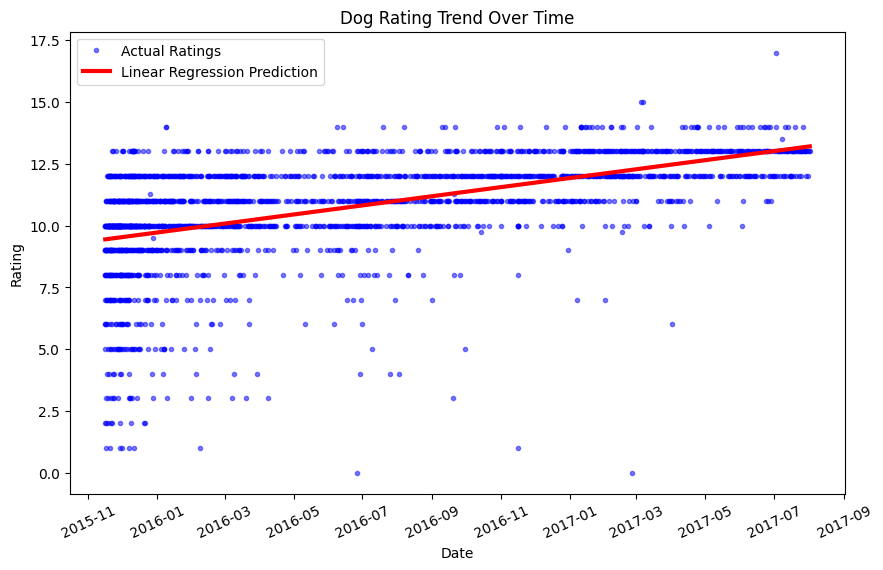

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import re

dog_ratings = pd.read_csv('twitter_dog_rates_data.csv')

dog_ratings['rating'] = dog_ratings['text'].str.extract(r'(\d+(\.\d+)?)/10')[0].astype(float)

dog_ratings = dog_ratings.dropna(subset=['rating'])

dog_ratings = dog_ratings[dog_ratings['rating'] < 25]

dog_ratings['timestamp'] = pd.to_datetime(dog_ratings['timestamp'], utc=True)

dog_ratings['timestamp_seconds'] = (dog_ratings['timestamp'] - pd.Timestamp("1970-01-01", tz='UTC')) // pd.Timedelta('1s')

fit = stats.linregress(dog_ratings['timestamp_seconds'], dog_ratings['rating'])
dog_ratings['prediction'] = dog_ratings['timestamp_seconds'] * fit.slope + fit.intercept

plt.figure(figsize=(10, 6))
plt.xticks(rotation=25)
plt.plot(dog_ratings['timestamp'], dog_ratings['rating'], 'b.', alpha=0.5, label='Actual Ratings')
plt.plot(dog_ratings['timestamp'], dog_ratings['prediction'], 'r-', linewidth=3, label='Linear Regression Prediction')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Dog Rating Trend Over Time')
plt.legend()
plt.show()